In [197]:
# Import Libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [198]:
#reading the dataset
data= pd.read_excel("height_weight.xlsx")

In [229]:
data.head(5)

,Height,Weight
0,65,112
1,71,136
2,69,153
3,68,142
4,70,144


## EDA (Exploring Data Analysis)

In [200]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Height  51 non-null     int64
 1   Weight  51 non-null     int64
dtypes: int64(2)
memory usage: 948.0 bytes


In [201]:
data.describe()

,Height,Weight
count,51.000000,51.000000
mean,65.823529,149.862745
std,6.568732,17.629543
min,50.000000,112.000000
25%,64.000000,139.500000
50%,68.000000,155.000000
75%,70.000000,165.500000
max,78.000000,170.000000


In [202]:
data.isnull().sum()

Height    0
Weight    0
dtype: int64

In [203]:

# divide the dataset into dependent and independent features

X = data[['Weight']]
y = data['Height']

In [204]:
# spliting the data into training datast and testing dataset
from sklearn.model_selection import train_test_split

In [205]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [206]:
X_train.shape,X_test.shape

((40, 1), (11, 1))

In [207]:
y_train.shape,y_test.shape

((40,), (11,))

In [208]:
#Scaling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()



In [209]:
X_train =scaler.fit_transform(X_train)

In [210]:
X_train

array([[-2.0993186 ],
       [ 1.03933478],
       [-0.50245986],
       [ 0.81907841],
       [-0.33726758],
       [ 0.48869384],
       [ 0.37856565],
       [-1.43854947],
       [ 0.98427069],
       [-0.44739577],
       [-1.65880585],
       [-0.50245986],
       [ 0.81907841],
       [ 0.48869384],
       [ 0.92920659],
       [-1.98919041],
       [-2.0993186 ],
       [ 0.54375793],
       [ 0.8741425 ],
       [ 0.8741425 ],
       [-1.49361356],
       [ 0.26843746],
       [ 0.8741425 ],
       [-0.77778033],
       [ 0.81907841],
       [ 0.15830927],
       [ 0.98427069],
       [ 0.81907841],
       [ 1.03933478],
       [ 0.10324518],
       [-1.27335718],
       [ 0.98427069],
       [-0.55752396],
       [ 1.09439888],
       [-0.94297262],
       [-0.77778033],
       [ 0.26843746],
       [-0.61258805],
       [ 0.81907841],
       [ 1.03933478]])

In [211]:
X_test = scaler.transform(X_test)

In [212]:
X_test

array([[ 0.43362974],
       [ 0.92920659],
       [ 0.48869384],
       [-1.38348537],
       [ 0.98427069],
       [ 0.37856565],
       [-0.44739577],
       [-0.1170112 ],
       [-0.44739577],
       [-0.00688301],
       [-1.54867766]])

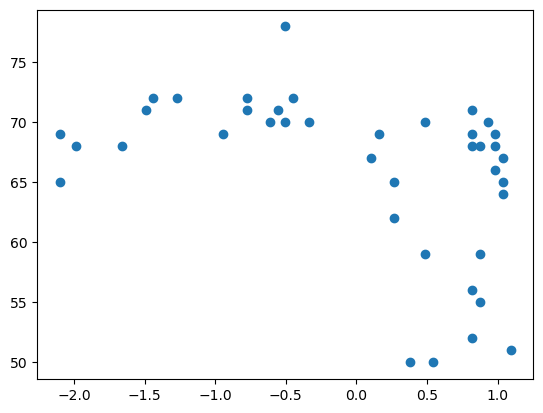

In [213]:
plt.scatter(X_train,y_train)

In [214]:
#training the data

In [215]:
from sklearn.linear_model import LinearRegression

In [216]:
regressor = LinearRegression()

In [217]:
regressor.fit(X_train,y_train)

LinearRegression()

In [218]:
regressor.intercept_

65.95

In [219]:
regressor.coef_

array([-2.90566344])

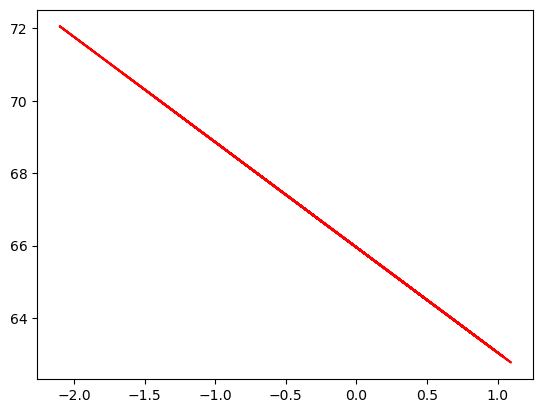

In [220]:
plt.plot(X_train,regressor.predict(X_train),'r')

### prediction of train data
1. predicted height output =intercept + coef_(Weights)
2. y_pred_train  = 69.83 + 0.079(X_train)

### predictionof test data
1. predicted height output =intercept + coef_(Weights)
2. y_pred_test  = 69.83 + 0.079(X_test)

In [221]:
y_pred_test = regressor.predict(X_test)

In [222]:
y_pred_test

array([64.69001791, 63.25003837, 64.53002018, 69.96994286, 63.09004065,
       64.85001563, 67.24998152, 66.28999517, 67.24998152, 65.96999972,
       70.44993604])

#### Performance Metrics - MAE,MSE,RMSE

In [223]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [224]:
mse = mean_squared_error(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
rmse = np.sqrt(mse)

In [225]:
mse,mae,rmse

(19.57313956218097, 3.1427458526748824, 4.424154106965643)

In [226]:
from sklearn.metrics import r2_score


In [227]:
score = r2_score(y_test,X_test)
score

-136.89694502493288